In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_csv('./data/Heart Classification Task - Data.csv')
df.head()
df.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


(303, 14)

In [3]:
numeric_variable = ['trestbps', 'chol', 'thalach', 'oldpeak', 'age']
categorical_variable = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Numeric Features

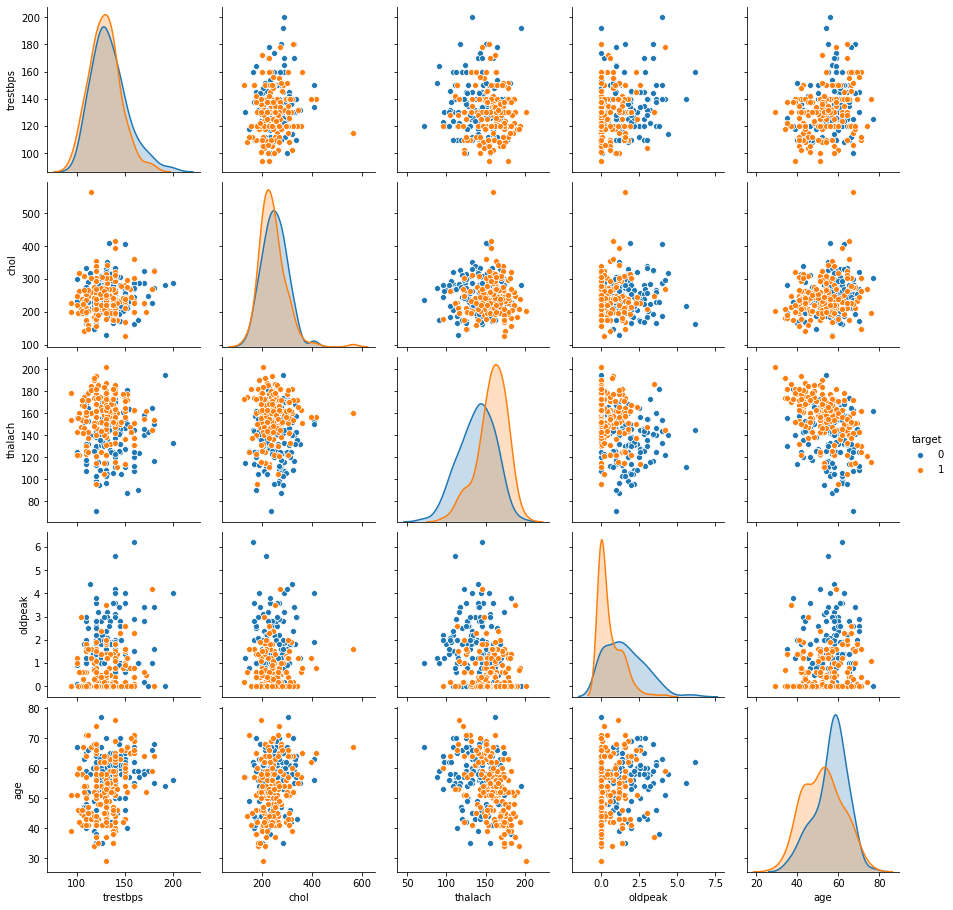

In [4]:
sns.pairplot(df[numeric_variable + ['target']], hue='target')

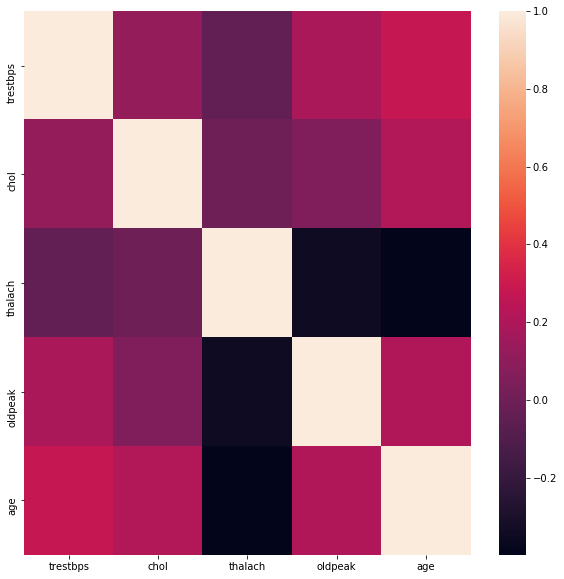

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
_ = sns.heatmap(df[numeric_variable].corr(), )

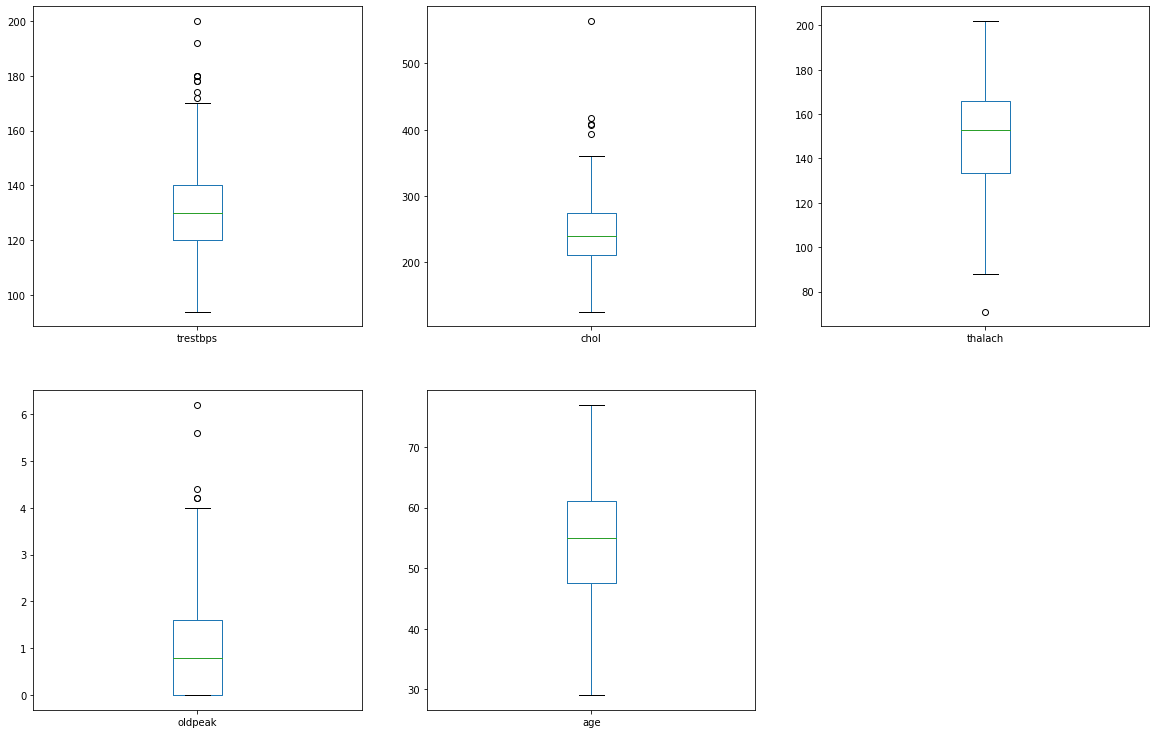

In [6]:
_ = df[numeric_variable].plot(kind='box', subplots=True, layout=(3,3), figsize=(20,20))
plt.show()

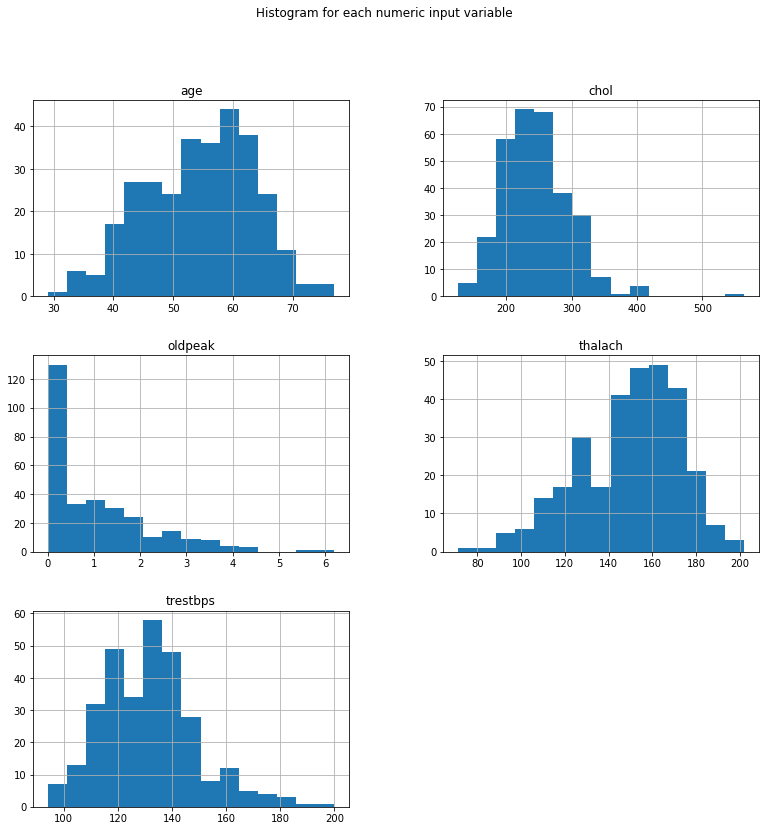

In [7]:
import pylab as pl
_ = df[numeric_variable].hist(bins=15, figsize=(13,13))
_ = pl.suptitle("Histogram for each numeric input variable")
plt.show()

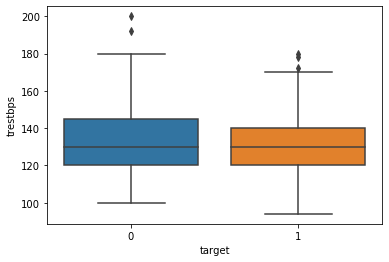

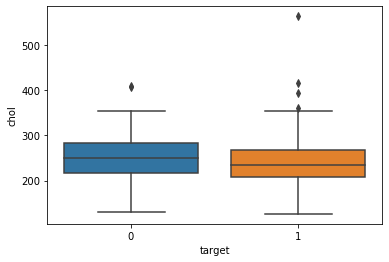

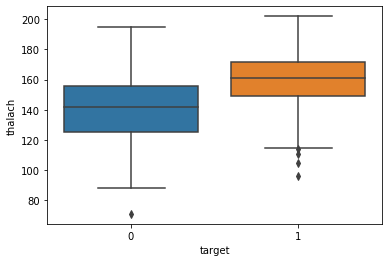

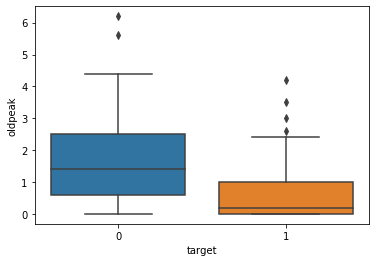

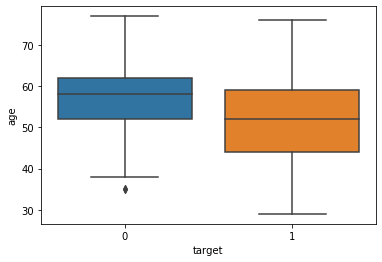

<Figure size 432x288 with 0 Axes>

In [8]:
for i in numeric_variable:
    _ = sns.boxplot(x="target", y= i , data=df)
    _ = plt.figure(i)

# Categorical Features

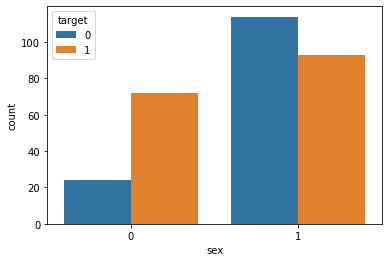

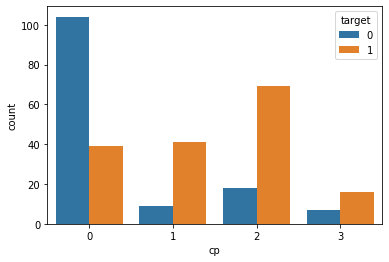

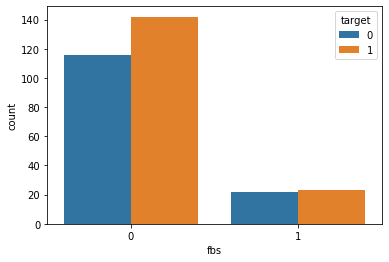

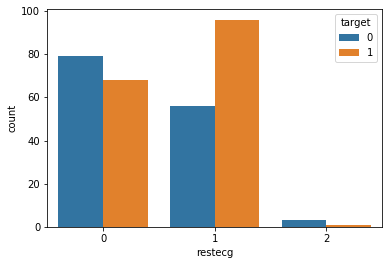

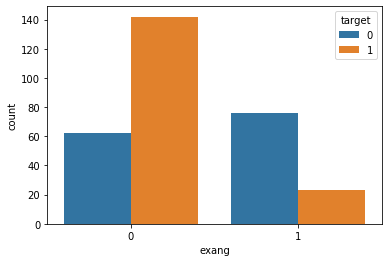

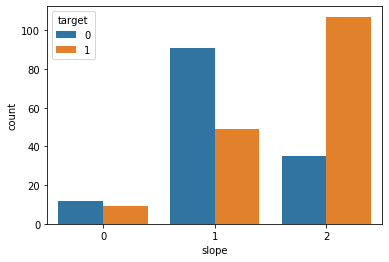

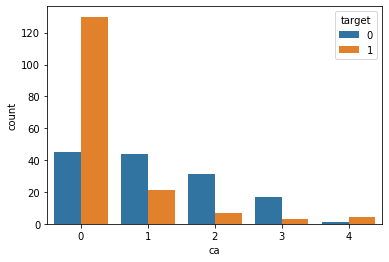

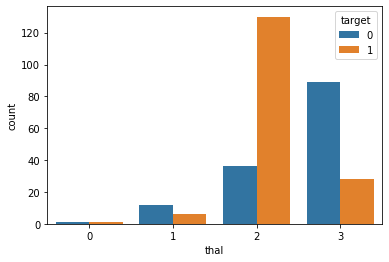

<Figure size 432x288 with 0 Axes>

In [9]:
for i in categorical_variable:
    _ = sns.countplot(x = df[i], hue = df['target'],data=df)
    _ = plt.figure(i)

# Feature importance

In [10]:
from xgboost import XGBClassifier

In [11]:
model = XGBClassifier()
_ = model.fit(df.drop('target', axis=1), df['target'])

In [12]:
importance_feature = pd.concat(
    [
        pd.Series(df.drop('target', axis=1).columns),
        pd.Series(model.feature_importances_)
    ],
    axis=1
)

importance_feature.set_index(0, inplace=True)
importance_feature.columns = ['score']
importance_feature.sort_values('score', ascending=False)

,score
0,
cp,0.229090
thal,0.180093
ca,0.138294
exang,0.088115
oldpeak,0.065899
slope,0.059119
sex,0.051821
age,0.038006
fbs,0.034018
